In [1]:
%cd ../

/Users/alejandro.jimenez/Documents/reference_repos/titanic-ml-model


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
source_df = pd.read_csv('./data/raw/train.csv')

In [4]:
from titanic_ml_model.data.preprocessing import DataPreprocessor

/Users/alejandro.jimenez/anaconda3/envs/titanic_ml/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/alejandro.jimenez/anaconda3/envs/titanic_ml/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-ji

In [5]:
dp = DataPreprocessor(source_df)

In [6]:
dp.prepare_data()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
dp.train_y

In [8]:
dp.feature_engineering()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,None,0,A/5,21171.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,1,PC,17599.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,None,0,STON/O2.,3101282.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,1,None,113803.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,None,0,None,373450.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,None,0,None,211536.0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,42.0,B,1,None,112053.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,None,0,W./C.,6607.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,148.0,C,1,None,111369.0,Mr


In [9]:
dp.train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,None,0,A/5,21171.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,1,PC,17599.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,None,0,STON/O2.,3101282.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,1,None,113803.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,None,0,None,373450.0,Mr


In [10]:
dp.handle_missing_values()

,pclass,sex,age,sibsp,parch,fare,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title,survived
0,3,male,22.0,1,0,7.2500,S,NaN,U,0,A/5,9.960435,Mr,0
1,1,female,38.0,1,0,71.2833,C,85.0,C,1,PC,9.775654,Mrs,1
2,3,female,26.0,0,0,7.9250,S,NaN,U,0,Misc,14.947326,Miss,1
3,1,female,35.0,1,0,53.1000,S,123.0,C,1,OTHER,11.642233,Mrs,1
4,3,male,35.0,0,0,8.0500,S,NaN,U,0,OTHER,12.830542,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,NaN,U,0,OTHER,12.262155,Rev,0
887,1,female,19.0,0,0,30.0000,S,42.0,B,1,OTHER,11.626736,Miss,1
888,3,female,NaN,1,2,23.4500,S,NaN,U,0,Misc,8.796036,Miss,0
889,1,male,26.0,0,0,30.0000,C,148.0,C,1,OTHER,11.620613,Mr,1


In [11]:
dp.train_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title,survived
0,3,male,22.0,1,0,7.2500,S,NaN,U,0,A/5,9.960435,Mr,0
1,1,female,38.0,1,0,71.2833,C,85.0,C,1,PC,9.775654,Mrs,1
2,3,female,26.0,0,0,7.9250,S,NaN,U,0,Misc,14.947326,Miss,1
3,1,female,35.0,1,0,53.1000,S,123.0,C,1,OTHER,11.642233,Mrs,1
4,3,male,35.0,0,0,8.0500,S,NaN,U,0,OTHER,12.830542,Mr,0


In [12]:
dp.transform_data()

,pclass,sex,age,sibsp,parch,fare,embarked,cabin_number,cabin_letter,cabin_size,ticket_label,ticket_number,name_title,survived
0,3,1,22.000000,1,0,7.2500,0.336957,50.6675,0.299854,0,0.100000,9.960435,0.156673,0
1,1,0,38.000000,1,0,71.2833,0.553571,85.0000,0.593220,1,0.650000,9.775654,0.792000,1
2,3,0,26.000000,0,0,7.9250,0.336957,50.6675,0.299854,0,0.247934,14.947326,0.697802,1
3,1,0,35.000000,1,0,53.1000,0.336957,123.0000,0.593220,1,0.384266,11.642233,0.792000,1
4,3,1,35.000000,0,0,8.0500,0.336957,50.6675,0.299854,0,0.384266,12.830542,0.156673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.336957,50.6675,0.299854,0,0.384266,12.262155,0.000000,0
887,1,0,19.000000,0,0,30.0000,0.336957,42.0000,0.744681,1,0.384266,11.626736,0.697802,1
888,3,0,29.699118,1,2,23.4500,0.336957,50.6675,0.299854,0,0.247934,8.796036,0.697802,0
889,1,1,26.000000,0,0,30.0000,0.553571,148.0000,0.593220,1,0.384266,11.620613,0.156673,1


In [13]:
X = dp.train_df.drop('survived', axis = 1)
y = dp.train_df['survived']

In [14]:
from titanic_ml_model.models.model import TitanicModel

In [15]:
model  = TitanicModel(2)

In [16]:
model.train(X, y)

In [17]:
model.evaluate(X, y)

{'accuracy': 0.8754208754208754,
 'f1_score': 0.8345752608047688,
 'precision': 0.851063829787234,
 'recall': 0.8187134502923976,
 'confusion_matrix': array([[500,  49],
        [ 62, 280]])}

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Model parameters:
Max depth: 3
Min samples leaf: 5
Learning rate: 0.046415888336127774
L2 regularization: 0.0
SHAP values:
pclass: 0.7419039596609248
sex: 0.004903678659989902
age: 0.29806154686191966
sibsp: 0.05362072469668531
parch: 0.0010155423390936244
fare: 0.4108643707000881
embarked: 0.16911898303876413
cabin_number: 0.45342049840006654
cabin_letter: 0.01166388967728999
cabin_size: 0.0025735355341810736
ticket_label: 0.05622211591978737
ticket_number: 0.45464552967685723
name_title: 0.4414660232577878



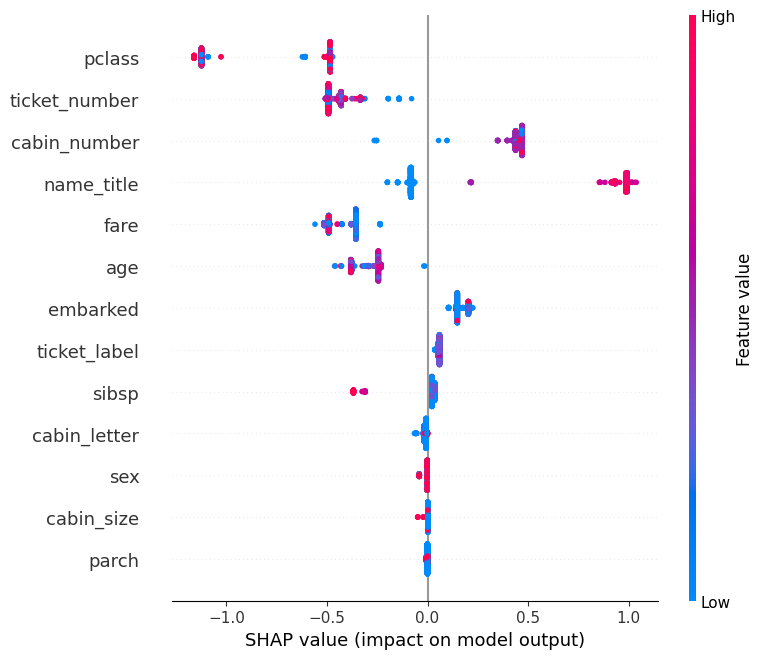

In [18]:
print(model.summarize_model())

In [20]:
model.save("./output/model/model_weights.pkl")

In [20]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,